In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv("../raw_data/ds_salaries.csv")
data2 = pd.read_csv("../raw_data/data_cleaned_2021.csv")

In [3]:
print("Data 1:")
print(data1.head())
print("\nData 2:")
print(data2.head())

Data 1:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1         

In [4]:
# Vérification des doublons
doublons = data2.duplicated().sum()
if doublons > 0:
    print("Il y a", doublons, "doublons dans la base de données.")
else:
    print("Il n'y a pas de doublons dans la base de données.")

Il n'y a pas de doublons dans la base de données.


In [5]:
# Vérification des valeurs manquantes
valeurs_manquantes = data2.isnull().sum().sum()
if valeurs_manquantes > 0:
    print("Il y a", valeurs_manquantes, "valeurs manquantes dans la base de données.")
else:
    print("Il n'y a pas de valeurs manquantes dans la base de données.")

Il n'y a pas de valeurs manquantes dans la base de données.


In [6]:
# Afficher les colonnes pour vérifier les noms
print("Colonnes de data2:")
print(data2.columns)

Colonnes de data2:
Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')


In [7]:
# Sélectionner les colonnes pertinentes
tool_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
selected_columns = tool_columns + ['Job Title', 'Salary', 'Experience', 'Company', 'Location']

# Vérifier si les colonnes existent dans le dataset
available_columns = [col for col in selected_columns if col in data2.columns]

# Filtrer les données pour ne garder que les colonnes disponibles
data2_tools = data2[available_columns]

# Créer un diagramme en barres pour les outils les plus couramment utilisés
tool_counts = data2_tools[tool_columns].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

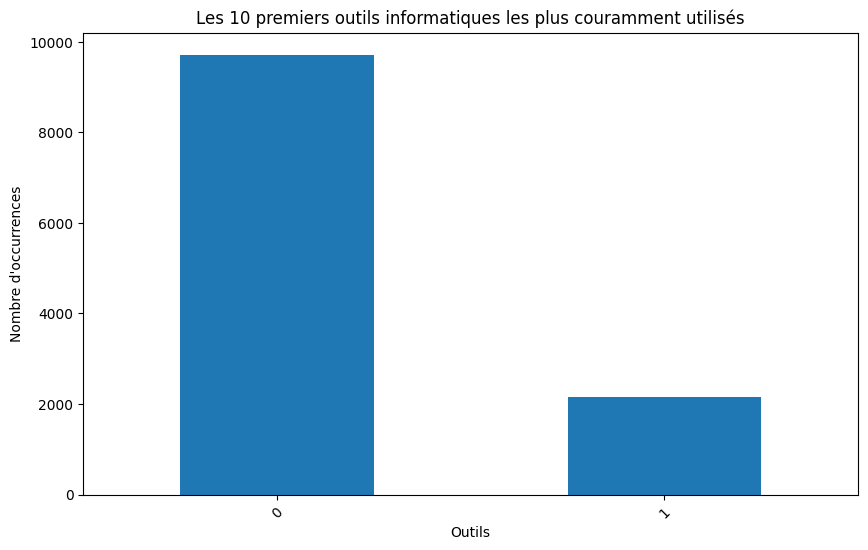

In [8]:
# Diagramme en barres des 10 premiers outils les plus couramment utilisés
top_tools = tool_counts.head(10)
plt.figure(figsize=(10, 6))
top_tools.plot(kind='bar')
plt.title('Les 10 premiers outils informatiques les plus couramment utilisés')
plt.xlabel('Outils')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

In [9]:
outil_counts = data2['tool_columns'].value_counts()

KeyError: 'tool_columns'

In [ ]:
# Heatmap des compétences corrélées
corr = data2_tools[tool_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap des compétences corrélées')
plt.show()

In [ ]:
# Histogramme de la distribution des salaires par niveau d'expérience
plt.figure(figsize=(10, 6))
sns.histplot(data=data2_tools, x='Salary', hue='Experience', bins=20, multiple='stack')
plt.title('Distribution des salaires par niveau d\'expérience')
plt.xlabel('Salaire')
plt.ylabel('Nombre de salariés')
plt.legend(title='Niveau d\'expérience')
plt.show()

In [ ]:
# Boxplot des salaires par niveau d'expérience
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience', y='Salary', data=data2_tools)
plt.title('Boxplot des salaires par niveau d\'expérience')
plt.xlabel('Niveau d\'expérience')
plt.ylabel('Salaire')
plt.show()

In [ ]:
# Histogramme de la distribution des salaires par localisation
plt.figure(figsize=(10, 6))
sns.histplot(data=data2_tools, x='Salary', hue='Location', bins=20, multiple='stack')
plt.title('Distribution des salaires par localisation')
plt.xlabel('Salaire')
plt.ylabel('Nombre de salariés')
plt.legend(title='Localisation')
plt.show()